# Analisando o bot

Este jupyter-notebook vai auxiliar na análise de detecção de intenções da Taís.

## Instalação

### Configurando jupyter

In [1]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))

### Listando versões

In [2]:
import rasa_nlu

print("rasa_nlu: {}".format(rasa_nlu.__version__))

rasa_nlu: 0.13.7


### Treinando o modelo do Rasa NLU

Na celula abaixo todas as intents na pasta `../data/intents/` serão utilizadas para gerar a matrix de confuzão para de avaliação do bot.

Ela irá treinar o modelo e executar a avaliação que pode ser verificada na saída da célula abaixo.

In [3]:
import os

from rasa_nlu.training_data import load_data
from rasa_nlu.model import Trainer
from rasa_nlu import config


intents_directory = '../../bot/data/intents/'

intents = {}

for intent_file in os.listdir(intents_directory):
    intent_file_path = os.path.join(intents_directory, intent_file)

    intents[intent_file] = {}

    intent_list = []
    intent_name = None

    with open(intent_file_path) as f:
        lines = f.readlines()

        for line in lines:
            line = line.strip()

            if line.startswith('##'):
                if intent_name is not None:
                    intents[intent_file][intent_name] = intent_list
                intent_name = line.replace('## intent:', '') 
                intent_list = []

            elif line.startswith('- '):
                intent_list.append(line.replace('- ', ''))


# loading the nlu training samples
training_data = load_data(intents_directory)

# trainer to educate our pipeline
trainer = Trainer(config.load("../../bot/nlu_config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

INFO:rasa_nlu.training_data.loading:Training data format of ../../bot/data/intents/definicoes.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 75 (10 distinct intents)
	- Found intents: 'definicao', 'definicao_sefic', 'definicao_salic', 'definicao_minc', 'definicao_proponente', 'definicao_tais', 'definicao_vinculada', 'definicao_projeto', 'definicao_proposta', 'definicao_cnic'
	- entity examples: 0 (0 distinct entities)
	- found entities: 

INFO:rasa_nlu.training_data.loading:Training data format of ../../bot/data/intents/captacao.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 43 (3 distinct intents)
	- Found intents: 'captacao_como_captar', 'captacao', 'captacao_quando_captar'
	- entity examples: 0 (0 distinct entities)
	- found entities: 

INFO:rasa_nlu.training_data.loading:Training data format of ../../bot/data/intents/lei_rouanet.md is md
INFO:rasa_nlu.training_data.training_data:Training dat

INFO:tensorflow:Restoring parameters from /work/notebooks/intents/./models/nlu/default/current/intent_classifier_tensorflow_embedding.ckpt
INFO:rasa_nlu.training_data.loading:Training data format of ../../bot/data/intents/definicoes.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 75 (10 distinct intents)
	- Found intents: 'definicao', 'definicao_sefic', 'definicao_salic', 'definicao_minc', 'definicao_proponente', 'definicao_tais', 'definicao_vinculada', 'definicao_projeto', 'definicao_proposta', 'definicao_cnic'
	- entity examples: 0 (0 distinct entities)
	- found entities: 

INFO:rasa_nlu.training_data.loading:Training data format of ../../bot/data/intents/captacao.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 43 (3 distinct intents)
	- Found intents: 'captacao_como_captar', 'captacao', 'captacao_quando_captar'
	- entity examples: 0 (0 distinct entities)
	- found entities: 

INFO:rasa_nlu.train

INFO:rasa_nlu.evaluate:There were some nlu intent classification errors. Use `--verbose` to show them in the log.
INFO:rasa_nlu.evaluate:Model prediction errors saved to errors.json.
INFO:rasa_nlu.evaluate:Confusion matrix, without normalization: 
[[20  0  0 ...  0  0  1]
 [ 0  3  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0 16  0]
 [ 0  0  0 ...  0  0 11]]


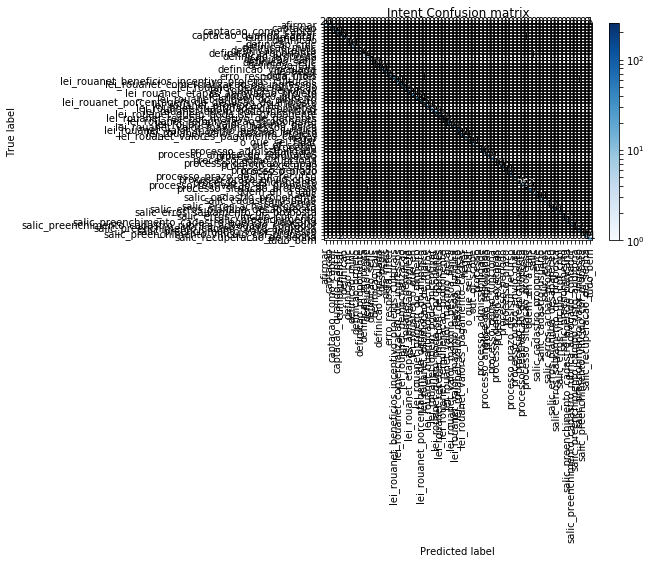

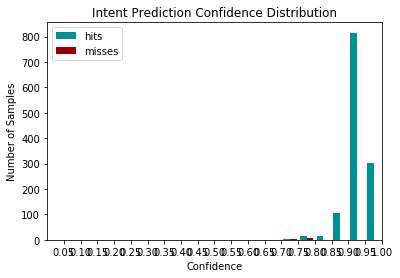

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  0.9992690711775128
INFO:rasa_nlu.evaluate:Precision: 0.9992923130242933
INFO:rasa_nlu.evaluate:Accuracy:  0.9992917847025495
INFO:rasa_nlu.evaluate:Classification report: 
                   precision    recall  f1-score   support

      lei_rouanet       1.00      0.88      0.94        33
        no_entity       1.00      1.00      1.00      5358
situacao_processo       1.00      1.00      1.00       257

      avg / total       1.00      1.00      1.00      5648



In [4]:
from rasa_nlu.evaluate import run_evaluation
run_evaluation('../../bot/data/intents/', model_directory)

### Lista de Problemas

O arquivo `erros,json` mostra os erros encontrados após executar o comando `rasa_nlu.evaluate.run_evaluation`.

Normalmente os erros mostrados são textos repetidos nos exemplos de diferrentes `intents`.

Caso o arquivo não seja gerado significa que não foram encontrados erros.

In [5]:
%cat errors.json

{
    "intent_errors": [
        {
            "text": "o que significa",
            "intent": "definicao",
            "intent_prediction": {
                "name": "processo_situacao_processo",
                "confidence": 0.9223301410675049
            }
        },
        {
            "text": "salic",
            "intent": "definicao_salic",
            "intent_prediction": {
                "name": "salic",
                "confidence": 0.7823630571365356
            }
        },
        {
            "text": "patrocinador",
            "intent": "lei_rouanet_beneficios_incentivo_projetos_culturais",
            "intent_prediction": {
                "name": "lei_rouanet_promocao_de_marca",
                "confidence": 0.7694490551948547
            }
        },
        {
            "text": "ingresso",
            "intent": "lei_rouanet_comercializacao_de_ingressos",
            "intent_prediction": {
                "name": "salic_preenchimento_valor_ingresso",
            

### Avaliação do modelo de NLU treinado

Caso queira testar mensagens específicas mande a mensagem na célula seguinte:

In [6]:
pprint(interpreter.parse('posso terceirizar a captação de recursos?'))

{
  "intent": {
    "name": "captacao_quando_captar",
    "confidence": 0.6886126399040222
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "captacao_quando_captar",
      "confidence": 0.6886126399040222
    },
    {
      "name": "captacao_como_captar",
      "confidence": 0.6591516137123108
    },
    {
      "name": "lei_rouanet_quem_pode_ser_proponente",
      "confidence": 0.40115323662757874
    },
    {
      "name": "despedir",
      "confidence": 0.37931501865386963
    },
    {
      "name": "erro_resposta_utter",
      "confidence": 0.28110381960868835
    },
    {
      "name": "processo_periodo",
      "confidence": 0.27443355321884155
    },
    {
      "name": "salic_preenchimento_valor_ingresso",
      "confidence": 0.26903098821640015
    },
    {
      "name": "lei_rouanet_quem_pode_incentivar",
      "confidence": 0.2543904483318329
    },
    {
      "name": "lei_rouanet_beneficios_incentivo_projetos_culturais",
      "confidence": 0.219828635454177